In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [4]:
# Downloaded from: http://football-data.co.uk/
data = pd.read_csv("../tutorials/FCPython/datasets/P1.csv")
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,P1,06/08/2021,20:15,Sp Lisbon,Vizela,3,0,H,0,0,...,2.30,-1.75,2.03,1.87,2.01,1.88,2.06,1.99,1.98,1.86
1,P1,07/08/2021,12:45,Arouca,Estoril,0,2,A,0,1,...,1.48,-0.25,1.98,1.92,1.97,1.93,2.02,2.04,1.94,1.89
2,P1,07/08/2021,18:00,Moreirense,Benfica,1,2,A,1,2,...,2.13,1.25,1.93,1.97,1.93,1.97,2.01,2.00,1.90,1.94
3,P1,07/08/2021,20:30,Maritimo,Sp Braga,0,2,A,0,0,...,1.63,0.50,2.02,1.77,2.10,1.83,2.11,1.87,2.04,1.80
4,P1,08/08/2021,15:30,Guimaraes,Portimonense,0,1,A,0,0,...,1.63,-0.50,1.99,1.91,1.98,1.93,2.02,1.93,1.96,1.88


In [7]:
#Create a list of unique teams from the home team column
Teams = data.HomeTeam.unique()

#Create a dictionary called TeamLists. There will be an entry for each team with the list [0]
TeamLists = {Team : [0] for Team in Teams}

In [8]:
#For each row in our dataframe, I want to do the following:
for row in data.itertuples():
    #Add the home and away team names to the correct variable
    Home = row.HomeTeam
    Away = row.AwayTeam
    
    #If the home team goals (FTHG column in the dataframe) are higher than the away team, give the correct points to each team
    if row.FTHG > row.FTAG:
        TeamLists[Home].append(3)
        TeamLists[Away].append(0)
    #If the home team goals are less than the away team, give the correct points
    elif row.FTHG < row.FTAG:
        TeamLists[Home].append(0)
        TeamLists[Away].append(3)
    #In any other case (a draw), give the correct points
    else:
        TeamLists[Home].append(1)
        TeamLists[Away].append(1)

In [12]:
Teams = data.HomeTeam.unique()
TeamLists = {Team : [0] for Team in Teams}

for row in data.itertuples():
    Home = row.HomeTeam
    Away = row.AwayTeam
    
    if row.FTHG > row.FTAG:
        TeamLists[Home].append(TeamLists[Home][-1]+3)
        TeamLists[Away].append(TeamLists[Away][-1]+0)
    elif row.FTHG < row.FTAG:
        TeamLists[Home].append(TeamLists[Home][-1]+0)
        TeamLists[Away].append(TeamLists[Away][-1]+3)
    else:
        TeamLists[Home].append(TeamLists[Home][-1]+1)
        TeamLists[Away].append(TeamLists[Away][-1]+1)

In [20]:
Matchday = list(range(0,35))

In [37]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#202020"
filler = "#FFFF50"
primary = "#FF6666"

Text(0.05, 0.05, 'Criado por João Alves / @joao97_alves. Dados obtidos em football-data.co.uk')

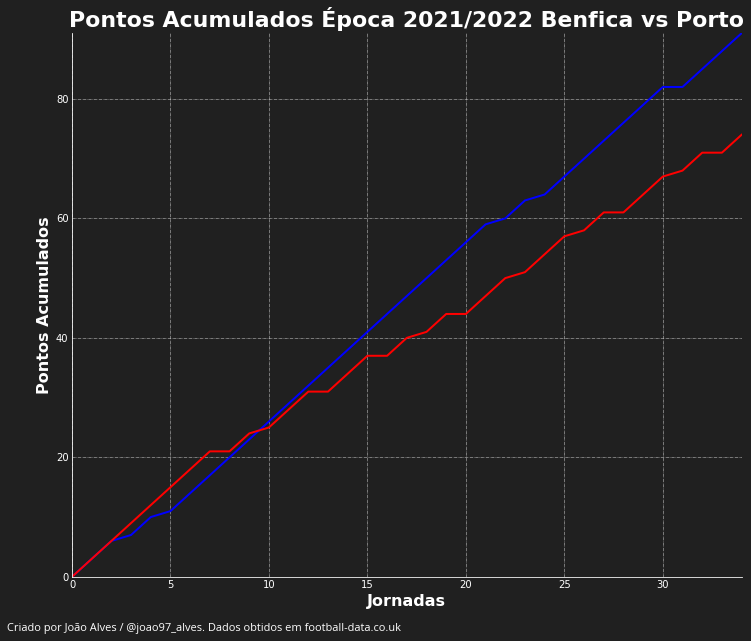

In [46]:
fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor(background)
ax.set_facecolor(background)
ax.patch.set_alpha(0)

ax.tick_params(colors="white", which='both', labelsize=10)

#Create a line plot with matchday and teamlist figures for two teams
plt.plot(Matchday, TeamLists["Porto"], color="blue", linewidth=2)
plt.plot(Matchday, TeamLists["Benfica"], color="red", linewidth=2)
plt.margins(x=0,y=0)


#title + labels
ax.set_title("Pontos Acumulados Época 2021/2022 Benfica vs Porto" ,fontsize=22, fontfamily=title_font,color=text_color, fontweight = 'bold')
ax.set_xlabel("Jornadas", fontfamily=title_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("Pontos Acumulados", fontfamily=title_font, fontweight="bold", fontsize= 16, color=text_color)

#eixos
ax.tick_params(axis="both",length=0)
spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color("white")

ax.grid(ls="-.",lw="0.5",color="lightgrey", zorder=1)


fig.text(0.05, 0.05, "Criado por João Alves / @joao97_alves. Dados obtidos em football-data.co.uk",
        fontsize=11, fontfamily=body_font, color=text_color)